In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import re
plt.rc('text', usetex=True)


In [3]:
plist=[0.1, 5.0, 10.0, 15.0]
styles = {0.1:'-',5: '-.',10: '--', 15:':'}

In [104]:
#read properties
df = pd.read_csv("Tables/Toluene_PT.txt", sep='\t')
# dfSU2PR = pd.read_csv("Toluene_SU2_PRS.txt", sep='\t')
# dfSU2IG = pd.read_csv("Toluene_SU2_IGS.txt", sep='\t')
# dfSU2VDW = pd.read_csv("Toluene_SU2_VDW.txt", sep='\t')

In [36]:
cols = filter(lambda x: re.match('^mu', x) is not None, df.columns)
for col in cols:  df[col] = df[col]*1000;

Index([u'P_PR', u'T_PR', u'rho_PR', u'mu_PR', u'k_PR', u'cp_PR', u'e_PR',
       u's_PR', u'c_PR', u'h_PR', u'dkdT_rho_PR', u'dkdrho_T_PR',
       u'dmudT_rho_PR', u'dmudrho_T_PR', u'dsdrho_P_PR', u'dsdP_rho_PR',
       u'dhdrho_P_PR', u'dhdP_rho_PR', u'P_IG', u'T_IG', u'rho_IG', u'mu_IG',
       u'k_IG', u'cp_IG', u'e_IG', u's_IG', u'c_IG', u'h_IG', u'dkdT_rho_IG',
       u'dkdrho_T_IG', u'dmudT_rho_IG', u'dmudrho_T_IG', u'dsdrho_P_IG',
       u'dsdP_rho_IG', u'dhdrho_P_IG', u'dhdP_rho_IG', u'P', u'T',
       u'dhdrho_P_CP', u'dhdP_rho_CP', u'dsdrho_P_CP', u'dsdP_rho_CP',
       u'rho_CP', u'mu_CP', u'k_CP', u'cp_CP', u's_CP', u'e_CP', u'c_CP',
       u'h_CP'],
      dtype='object')

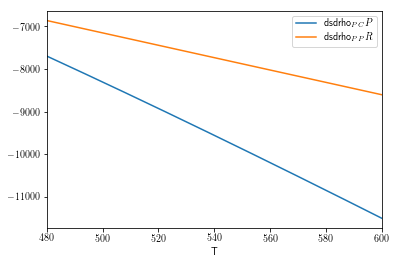

In [138]:
df2= pd.read_csv("Tables/Toluene_PT.txt", sep='\t')
fig, ax =plt.subplots()
# df2
# df2[abs(df2["P"] -0.1)<1e-5]
df2[abs(df2["P"] -0.1)<1e-5].plot(x='T', y='dsdrho_P_CP', ax=ax)
df2[abs(df2["P"] -0.1)<1e-5].plot(x='T', y='dsdrho_P_PR', ax=ax)
df2.columns
# df2['dhdrho_P']
# df2[abs(df["P"] -18)<1e-5].plot(x='T', y='c_CP', ax=ax)
# ax.set_xlim([540, 600])

In [87]:
#scaling the cp and the enthalpy, entropy and internal energy to reference conditions
dfFluid['cp']=dfFluid['cp']*1000
dfFluid['es']=dfFluid['e']+225.910
dfFluid['hs']=dfFluid['h']+225.910
dfFluid['ss']=dfFluid['s']+7.860
dfSU2PR['es']=dfSU2PR['e']/1000
dfSU2PR['hs']=dfSU2PR['h']/1000
dfSU2PR['ss']=dfSU2PR['s']/1000
dfSU2PR['k']=dfSU2PR['k']
dfSU2PR['k']=dfSU2PR['k']

dfSU2PR['k']=dfSU2PR['k']

#dfSU2PR['der']=dfSU2PR['k']

dfSU2IG['es']=dfSU2IG['e']/1000
dfSU2IG['hs']=dfSU2IG['h']/1000
dfSU2IG['ss']=dfSU2IG['s']/1000
dfSU2PR['mus']=dfSU2PR['mu']*1e6
dfSU2IG['mus']=dfSU2IG['mu']*1e6
dfFluid['mus']=dfFluid['mu']*1e6
dfSU2PR['dmuTs']=dfSU2PR['dmuT']*1e6
dfSU2IG['dmuTs']=dfSU2IG['dmuT']*1e6
dfSU2PR['dmurhos']=dfSU2PR['dmurho']*1e6
dfSU2IG['dmurhos']=dfSU2IG['dmurho']*1e6

NameError: name 'dfFluid' is not defined

In [64]:
df['es_PR']=df['e_PR']-278000;
df['es_IG']=df['e_IG']-278000;
# df['k_IG']=df['k_IG']*1000;
grouped = df[(df['P'].isin(plist))  & (df["rho_CP"]<300)  & (df["P"]<=18)].groupby("P")
# groupedPR = dfSU2PR[(dfSU2PR['P'].isin(plist))  ].groupby("P")
# groupedIG = dfSU2IG[(dfSU2IG['P'].isin(plist))  ].groupby("P")
# groupedVDW = dfSU2VDW[(dfSU2IG['P'].isin(plist))  ].groupby("P")

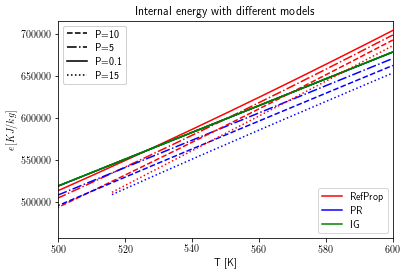

In [65]:
fig,ax = plt.subplots()
for name,  group in grouped:
    style = styles[name]
    grouped.get_group(name).plot(x='T', y='e_CP',ax = ax, color='r', linestyle=style)
    grouped.get_group(name).plot(x='T', y='es_PR',ax = ax, color='b', linestyle=style)
    grouped.get_group(name).plot(x='T', y='es_IG',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle e [KJ / kg]$')
ax.set_xlabel('T [K]')
ax.set_title("Internal energy with different models")
ax.set_xlim([500, 600])
# ax.set_ylim([700, 950])

legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

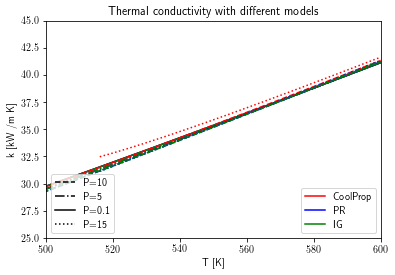

In [22]:
fig,ax = plt.subplots()
for name,  group in grouped:
    style = styles[name]
    grouped.get_group(name).plot(x='T', y='k_CP',ax = ax, color='r', linestyle=style)
    grouped.get_group(name).plot(x='T', y='k_PR',ax = ax, color='b', linestyle=style)
    grouped.get_group(name).plot(x='T', y='k_IG',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)

ax.set_ylabel('k [kW /m K]')
ax.set_xlabel('T [K]')
ax.set_title("Thermal conductivity with different models")
ax.set_xlim([500, 600])
ax.set_ylim([25,45])
legend1 = plt.legend(['CoolProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=3)

In [23]:
fig.savefig("test")

NameError: name 'groupedFluid' is not defined

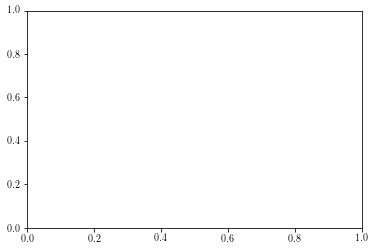

In [9]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='k',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='k',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='k',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)

ax.set_ylabel('k [W /m K]')
ax.set_xlabel('T [K]')
ax.set_title("Thermal conductivity with different models")
ax.set_xlim([500, 600])
ax.set_ylim([0.025,0.045])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=3)
ax.add_artist(legend2)
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
#     groupedFluid.get_group(name).plot(x='T', y='k',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='dkT',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='dkT',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)

ax.set_ylabel('k [W /m K]')
ax.set_xlabel('T [K]')
ax.set_title("Derivative of Thermal conductivity at constant pressure with different models")
ax.set_xlim([500, 600])
# ax.set_ylim([0.025,0.045])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=3)
ax.add_artist(legend2)



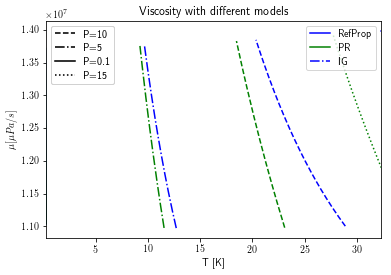

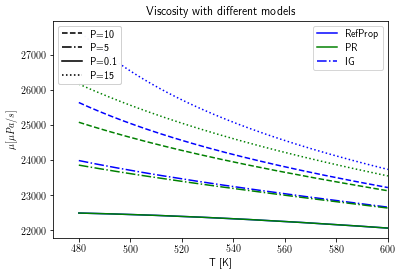

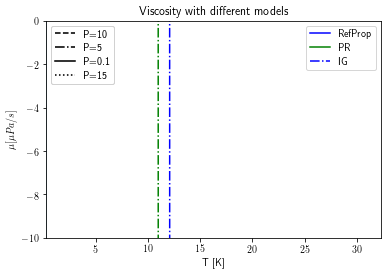

In [472]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
#     groupedFluid.get_group(name).plot(x='rho', y='mus',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='rho', y='mus',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='rho', y='mus',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle \mu [\mu Pa/ s]$')
ax.set_xlabel('T [K]')
ax.set_title("Viscosity with different models")
# ax.set_xlim([470, 600])
# ax.set_ylim([10, 15])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=1)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
#     groupedFluid.get_group(name).plot(x='T', y='dmuT',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='dmuTs',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='dmuTs',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle \mu [\mu Pa/ s]$')
ax.set_xlabel('T [K]')
ax.set_title("Viscosity with different models")
ax.set_xlim([470, 600])
# ax.set_ylim([10, 15])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=1)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)
fig,ax = plt.subplots()

for name,  group in groupedFluid:
    style = styles[name]
#     groupedFluid.get_group(name).plot(x='T', y='dmuT',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='rho', y='dmurhos',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='rho', y='dmurhos',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle \mu [\mu Pa/ s]$')
ax.set_xlabel('T [K]')
ax.set_title("Viscosity with different models")
# ax.set_xlim([470, 600])
ax.set_ylim([-10,0])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=1)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

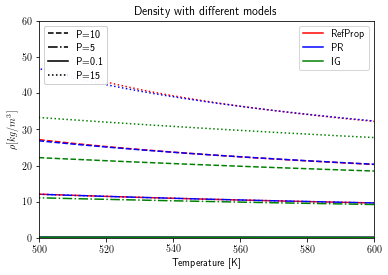

In [473]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='rho',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='rho',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='rho',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)
ax.set_ylabel(r'$\displaystyle \rho [kg/m^3]$')
ax.set_xlabel('Temperature [K]')
ax.set_title("Density with different models")
ax.set_xlim([500, 600])
ax.set_ylim([0, 60])
# legend1 = plt.legend(['RefProp', 'PR', 'IG', 'VDW'], loc=1)
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=1)

ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

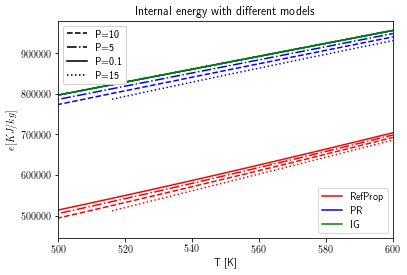

In [40]:
fig,ax = plt.subplots()
for name,  group in grouped:
    style = styles[name]
    grouped.get_group(name).plot(x='T', y='e_CP',ax = ax, color='r', linestyle=style)
    grouped.get_group(name).plot(x='T', y='e_PR',ax = ax, color='b', linestyle=style)
    grouped.get_group(name).plot(x='T', y='e_IG',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle e [KJ / kg]$')
ax.set_xlabel('T [K]')
ax.set_title("Internal energy with different models")
ax.set_xlim([500, 600])
# ax.set_ylim([700, 950])

legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

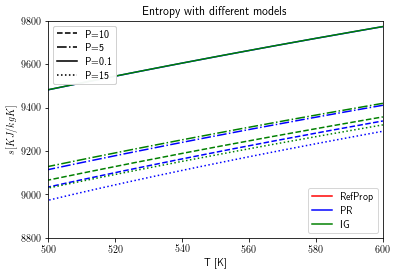

In [475]:

fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='ss',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='s',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='s',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle s [KJ /kg K]$')
ax.set_xlabel('T [K]')
ax.set_title("Entropy with different models")
ax.set_xlim([500, 600])
ax.set_ylim([8800, 9800])

legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

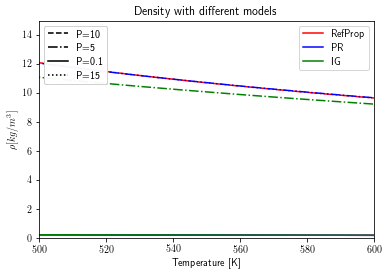

In [476]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='rho',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='rho',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='rho',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)
ax.set_ylabel(r'$\displaystyle \rho [kg/m^3]$')
ax.set_xlabel('Temperature [K]')
ax.set_title("Density with different models")
ax.set_xlim([500, 600])
ax.set_ylim([0, 15])
# legend1 = plt.legend(['RefProp', 'PR', 'IG', 'VDW'], loc=1)
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=1)

ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

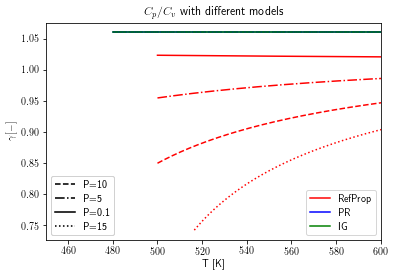

In [477]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='gamma',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='gamma',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='gamma',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)
ax.set_ylabel(r'$\displaystyle \gamma [-]$')
ax.set_xlabel('T [K]')
ax.set_title("$C_p/C_v$ with different models")
ax.set_xlim([450, 600])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=3)
ax.add_artist(legend2)


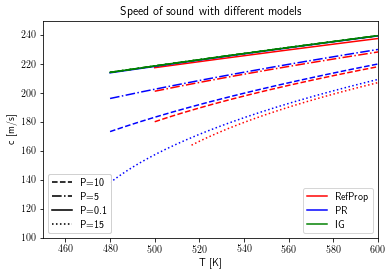

In [478]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='c',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='c',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='c',ax = ax, color='g', linestyle=style)
#     groupedVDW.get_group(name).plot(x='T', y='rho',ax = ax, color='y', linestyle=style)

ax.set_ylabel('c [m/s]')
ax.set_xlabel('T [K]')
ax.set_title("Speed of sound with different models")
ax.set_xlim([450, 600])
ax.set_ylim([100,250])
legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=3)
ax.add_artist(legend2)


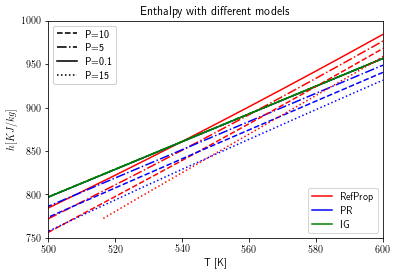

In [479]:
fig,ax = plt.subplots()
for name,  group in groupedFluid:
    style = styles[name]
    groupedFluid.get_group(name).plot(x='T', y='hs',ax = ax, color='r', linestyle=style)
    groupedPR.get_group(name).plot(x='T', y='hs',ax = ax, color='b', linestyle=style)
    groupedIG.get_group(name).plot(x='T', y='hs',ax = ax, color='g', linestyle=style)
ax.set_ylabel(r'$\displaystyle h [KJ / kg]$')
ax.set_xlabel('T [K]')
ax.set_title("Enthalpy with different models")
ax.set_xlim([500, 600])
ax.set_ylim([750, 1000])

legend1 = plt.legend(['RefProp', 'PR', 'IG'], loc=4)
ax.add_artist(legend1)
handles = [mlines.Line2D([], 
                         [], 
                         color='k',  
                         linestyle=value,
                         markersize=10, 
                         label='P='+str(name)) 
           for name, value in styles.iteritems()]
legend2= plt.legend(handles=handles, loc=2)
ax.add_artist(legend2)

In [480]:
dfSU2PR

,P,T,rho,mu,k,cp,cv,h,s,c,...,dkT,dkrho,dmuT,dmurho,es,hs,ss,mus,dmuTs,dmurhos
0,0.1,480.000,0.231289,11.0386,0.027590,1594.06,0,764937,9416.32,213.934,...,0.000107,-0.000034,0.022489,-0.010288,721.701,764.937,9.41632,11038600.0,22488.9,-10287.90
1,0.1,480.354,0.231118,11.0465,0.027628,1594.06,0,765502,9417.49,214.013,...,0.000107,-0.000034,0.022488,-0.010241,722.234,765.502,9.41749,11046500.0,22488.3,-10241.40
2,0.1,480.708,0.230947,11.0545,0.027666,1594.06,0,766066,9418.67,214.093,...,0.000107,-0.000033,0.022488,-0.010195,722.766,766.066,9.41867,11054500.0,22487.7,-10195.00
3,0.1,481.062,0.230776,11.0625,0.027704,1594.06,0,766631,9419.84,214.172,...,0.000107,-0.000033,0.022487,-0.010149,723.299,766.631,9.41984,11062500.0,22487.1,-10148.60
4,0.1,481.416,0.230606,11.0704,0.027742,1594.06,0,767195,9421.01,214.252,...,0.000107,-0.000033,0.022486,-0.010102,723.831,767.195,9.42101,11070400.0,22486.5,-10102.40
5,0.1,481.770,0.230435,11.0784,0.027780,1594.06,0,767760,9422.19,214.331,...,0.000107,-0.000033,0.022486,-0.010056,724.364,767.760,9.42219,11078400.0,22485.9,-10056.20
6,0.1,482.124,0.230265,11.0864,0.027818,1594.06,0,768324,9423.36,214.411,...,0.000107,-0.000033,0.022485,-0.010010,724.896,768.324,9.42336,11086400.0,22485.2,-10010.20
7,0.1,482.478,0.230095,11.0943,0.027856,1594.06,0,768889,9424.53,214.490,...,0.000108,-0.000033,0.022485,-0.009964,725.428,768.889,9.42453,11094300.0,22484.6,-9964.26
8,0.1,482.832,0.229926,11.1023,0.027894,1594.06,0,769453,9425.70,214.570,...,0.000108,-0.000033,0.022484,-0.009918,725.961,769.453,9.42570,11102300.0,22484.0,-9918.41
9,0.1,483.186,0.229757,11.1102,0.027932,1594.06,0,770018,9426.87,214.649,...,0.000108,-0.000033,0.022483,-0.009873,726.493,770.018,9.42687,11110200.0,22483.3,-9872.65


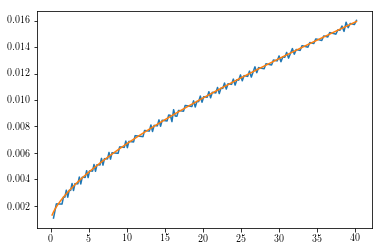

In [481]:
# recv= dfFluid[dfFluid.P==1]['mus']
recvs= dfSU2PR[abs(dfSU2PR['T']-600)<1e-6]['mu']
recT= dfSU2PR[abs(dfSU2PR['T']-600)<1e-6]['rho']

recv2= dfSU2PR[abs(dfSU2PR['T']-600)<1e-6]['dmurho']
recT1= dfSU2PR[abs(dfSU2PR['T']-600)<1e-6]['rho']

plt.plot(recT,recvs.diff() / recT.diff())
plt.plot(recT1, recv2)
# ax = plt.gca()
# ax.set_xlim([480,550])
# ax.set_ylim([3,4])




(1400, 2000)

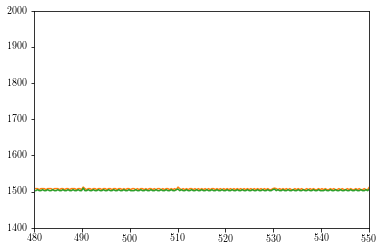

In [482]:
recv= dfFluid[dfFluid.P==1]['e']
recvs= dfFluid[dfFluid.P==1]['es']
recT= dfFluid[dfFluid.P==1]['T']
recv1= dfSU2PR[dfSU2PR.P==1]['e']
recT1= dfSU2PR[dfSU2PR.P==1]['T']
recv2= dfSU2IG[dfSU2IG.P==1]['e']
recT2= dfSU2IG[dfSU2IG.P==1]['T']
plt.plot(recT,recvs.diff() / recT.diff())
plt.plot(recT1,recv1.diff() / recT1.diff())
plt.plot(recT2,recv2.diff() / recT2.diff())
ax = plt.gca()
ax.set_xlim([480,550])
ax.set_ylim([1400,2000])

In [483]:
dfSU2PR.T

,0,1,2,3,4,5,6,7,8,9,...,61190,61191,61192,61193,61194,61195,61196,61197,61198,61199
P,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
T,4.800000e+02,4.803540e+02,4.807080e+02,4.810620e+02,4.814160e+02,4.817700e+02,4.821240e+02,4.824780e+02,4.828320e+02,4.831860e+02,...,5.968140e+02,5.971680e+02,5.975220e+02,5.978760e+02,5.982300e+02,5.985840e+02,5.989380e+02,5.992920e+02,5.996460e+02,6.000000e+02
rho,2.312890e-01,2.311180e-01,2.309470e-01,2.307760e-01,2.306060e-01,2.304350e-01,2.302650e-01,2.300950e-01,2.299260e-01,2.297570e-01,...,4.058540e+01,4.054160e+01,4.049800e+01,4.045440e+01,4.041100e+01,4.036780e+01,4.032460e+01,4.028160e+01,4.023880e+01,4.019600e+01
mu,1.103860e+01,1.104650e+01,1.105450e+01,1.106250e+01,1.107040e+01,1.107840e+01,1.108640e+01,1.109430e+01,1.110230e+01,1.111020e+01,...,1.403860e+01,1.404650e+01,1.405430e+01,1.406210e+01,1.406990e+01,1.407780e+01,1.408560e+01,1.409340e+01,1.410120e+01,1.410910e+01
k,2.759020e-02,2.762820e-02,2.766620e-02,2.770420e-02,2.774220e-02,2.778020e-02,2.781830e-02,2.785630e-02,2.789440e-02,2.793250e-02,...,4.104880e-02,4.109260e-02,4.113640e-02,4.118020e-02,4.122410e-02,4.126790e-02,4.131170e-02,4.135560e-02,4.139940e-02,4.144320e-02
cp,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,...,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03,1.594060e+03
cv,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
h,7.649370e+05,7.655020e+05,7.660660e+05,7.666310e+05,7.671950e+05,7.677600e+05,7.683240e+05,7.688890e+05,7.694530e+05,7.700180e+05,...,9.201630e+05,9.207710e+05,9.213780e+05,9.219860e+05,9.225930e+05,9.232000e+05,9.238080e+05,9.244150e+05,9.250210e+05,9.256280e+05
s,9.416320e+03,9.417490e+03,9.418670e+03,9.419840e+03,9.421010e+03,9.422190e+03,9.423360e+03,9.424530e+03,9.425700e+03,9.426870e+03,...,9.258160e+03,9.259180e+03,9.260190e+03,9.261210e+03,9.262230e+03,9.263240e+03,9.264250e+03,9.265270e+03,9.266280e+03,9.267290e+03
c,2.139340e+02,2.140130e+02,2.140930e+02,2.141720e+02,2.142520e+02,2.143310e+02,2.144110e+02,2.144900e+02,2.145700e+02,2.146490e+02,...,2.012540e+02,2.014080e+02,2.015620e+02,2.017160e+02,2.018690e+02,2.020230e+02,2.021750e+02,2.023280e+02,2.024800e+02,2.026320e+02


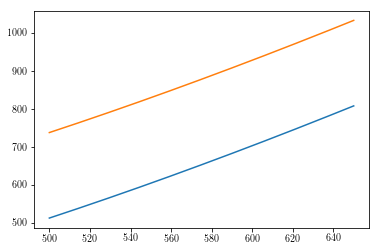

In [484]:

plt.plot(recT,recv)
plt.plot(recT,recvs)



In [139]:
    from scipy.optimize import fmin_slsqp


In [142]:
import SU2

In [144]:
config = SU2.io.Config("/home/azureuser/Documents/turbinerotor-optimization-su2/simulations/gustavo-0406201816/3d5ef2fe-bd6a-43ce-b809-1f0679a647ef/cfg/cfdsu2.cfg")

In [146]:
config.NZONES

'2'

In [ ]:
project = SU2.io.load_data("project.pkl")
